<div style="padding:30px; color: white; background-color: #0071CD">
<center>
<img src="img/logoub.jpeg">
<center>
<p>
<h1>Algorítmica Avanzada</h1>
<h2>Problemas 1.A - Grafos </h2>
</center>
</p>
</div>

## Atributos

Un grafo está formado por dos elementos principales, vértices (Nodes) y aristas (Edges). 

Los elementos atómicos de un grafo son los vértices, representados gráficamente con puntos. En el siguiente ejemplo podemos observar cómo creamos un grafo con tres nodos con la función: `add_nodes_from`

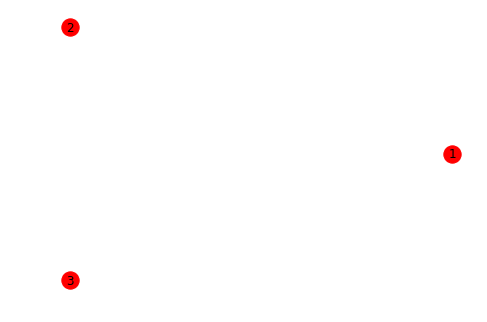

In [2]:
%matplotlib inline
import networkx as nx
G = nx.Graph()
G.add_nodes_from((1,2,3))
nx.draw_circular(G, with_labels=True)

El otro atributo principal de un __grafo__ son las aristas (edges), estas son las conexiones entre todos nuestros nodos. En el siguiente ejemplo de código podemos ver como añadimos los vértices que van de 1 a 2 y de 1 a 3 sobre el grafo con 3 nodos del ejemplo anterior.  

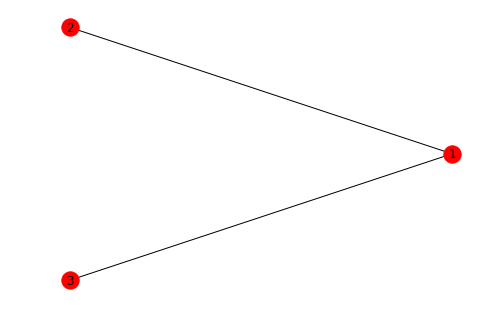

In [2]:
G.add_edges_from(((1,2), (1,3)))
nx.draw_circular(G, with_labels=True)

## Tipos de grafos

Hay diferentes tipos de grafos en función de sus características, en esta introducción destacaremos tres tipos:

- Grafos dirigidos
- Grafos inconexos
- Grafos regulares

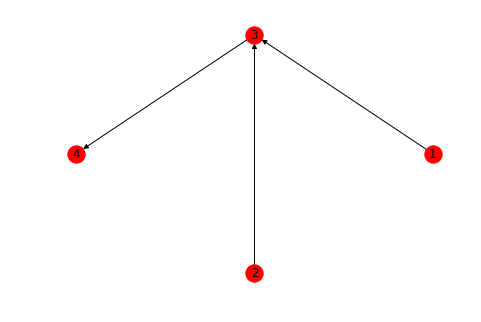

In [3]:
# Grafo dirigido:
# - Las aristas tienen dirección
DG = nx.DiGraph()
DG.add_edges_from(((1,3), (3,4), (2,3)))
nx.draw_circular(DG, with_labels=True)

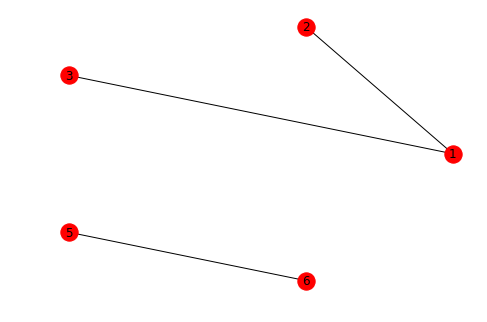

In [3]:
# Grafo inconexo no dirigido
# - Partiendo de un nodo cualquiera no se puede llegar a recorrer todo el grafo
UG = nx.Graph()
UG.add_edges_from(((1,2), (1,3), (5,6)))
nx.draw_circular(UG, with_labels=True)

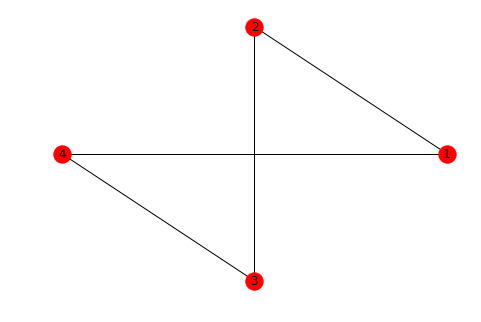

In [4]:
# Grafo regular no dirigido
# - Todos los nodos tienen el mismo grado
UG = nx.Graph()
UG.add_edges_from(((1,2), (1,4), (2,1), (2,3), (4,3)))
nx.draw_circular(UG, with_labels=True)

## Propiedades

- __Orden__ de un grafo: El orden de un grafo es el número de vértices que contiene.
- __Grado__ de un vértice: Número de aristas que conectan con un vértice (en el caso de grafos dirigidos hablaríamos de grado de entrada y de salida).

<div class="alert alert-danger">
<h1>Ejercicio</h1>
<p><strong>
Con la información de la que disponemos, tenéis que crear un gráfo de orden 5 en el que el grado de todos y cada uno de los vértices sea 4.
</strong></p>
</div>

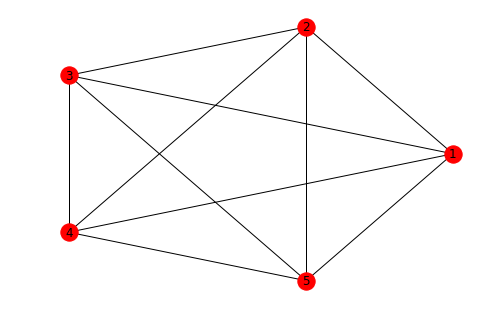

In [19]:
# Ejercicio 1
UG = nx.Graph()
UG.add_edges_from(((1,2), (1,3), (1,4), (1,5), (2,1), (2,3),(2,4),(2,5),(3,5),(4,3), (4,5)))
nx.draw_circular(UG, with_labels=True)

En el ejercicio anterior hemos dibujado lo que se llama un __grafo completo__. Este tipo de grafos se caracterizan porque todos los vértices están enlazados entre ellos.

<div class="alert alert-warning">
<h1>Pregunta</h1>
<p><strong>
En un gráfo completo de orden 4, ¿cuántas aristas existen? ¿Y en un grafo completo de orden $n$?
</strong></p>
</div>

6 aristas.
n(n-1)/2 aristas.

# Algoritmos sobre grafos
## Minimum Path


<div class="alert alert-success" style="width:90%; margin:0 auto;">
  <h2><p>0- Random Walk</p></h2>
  
  <p>
  La implementación de un algoritmo de random walk es, en este caso, un poco ingenua, ya que la utilizaremos para encontrar un camino entre dos puntos (no hace falta que sea el más corto). 
  </p>
  <p>
  Para el desarrollo de este algoritmo lo único que necesitamos es un nodo inicial y un nodo final. En cada iteración del algoritmo iremos visitando un nodo aleatorio de entre todos los posibles vecinos. El parámetro `repeat` determinará si un nodo que ya ha sido visitado puede volver a ser visitado de nuevo.
  </p>


<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Código </h3></p> </center> 

<p>
<h3>INPUT</h3>
<ul>
<li>__G__: Este es el grafo que utilizaremos para buscar el camino.</li>
<li>__origen__: Este parámetro corresponde al índice de un nodo. En este caso deberá ser un entero (e.g. 231).</li>
<li>__destino__: El índice del nodo al que queremos llegar. Igual que el origen, deberá ser un entero.</li>
<li>__repeat__: Booleano indicando si nodos se pueden visitar mas de una vez o no.</li>
</ul>
<br>
<h3>OUTPUT</h3>
El output de una funcion es un diccionario que contiene los siguientes valores
<ul>
<li>__'path'__: Una lista de índices correspondientes al camino encontrado del nodo origen al nodo destino, incluyendo ambos.</li>
<li>__'expanded'__: El número de nodos que se han visitado hasta encontrar el nodo destino.</li>
<ul>

</p>

</div>

In [143]:
import random
import numpy
%matplotlib inline

def random_walk(G, origen, destino, repeat=False):
    nb = []
    nb.append(origen)
    
    path = []
    
    found = False
    deadEnd = False
    sos = "me perdi, soy retrasado"
    
    expanded  = 0
    bucleInfinito = 99999
    
    while not deadEnd and not found:
        rand = random.randint(0,len(nb))
        node = nb[rand-1]

        if repeat:
            if expanded > bucleInfinito:
                return sos
            else:
                expanded += 1
                path.append(node)
                nb = list(G.neighbors(node))
                if destino == node:
                    trobat = True          
                    return {
                        'path' : path,
                        'expanded' : expanded
                    }
         
        else:    
            for elem in nb:
                if node in path and elem not in path:
                    node = elem
                    
            if node not in path:
                expanded += 1
                path.append(node)
                nb =  list(G.neighbors(node))
                if destino == node:
                    trobat = True          
                    return {
                        'path' : path,
                        'expanded' : expanded
                    }
                
            else:
                deadEnd = True
                return sos

In [144]:
import networkx as nx
# Prueba tu algoritmo
G = nx.generators.barabasi_albert_graph(100, 2) # Genera un grafo aleatorio
random_walk(G, 1, 95,True)

{'path': [1,
  73,
  20,
  73,
  1,
  63,
  47,
  97,
  4,
  0,
  6,
  92,
  6,
  14,
  2,
  11,
  75,
  59,
  75,
  86,
  33,
  25,
  29,
  3,
  50,
  60,
  4,
  9,
  43,
  9,
  92,
  6,
  74,
  8,
  87,
  8,
  5,
  3,
  4,
  9,
  26,
  9,
  4,
  15,
  91,
  15,
  18,
  3,
  31,
  84,
  31,
  11,
  75,
  59,
  11,
  99,
  11,
  10,
  27,
  2,
  5,
  57,
  5,
  2,
  5,
  8,
  66,
  20,
  9,
  92,
  9,
  98,
  9,
  98,
  44,
  13,
  1,
  30,
  4,
  3,
  50,
  70,
  1,
  15,
  1,
  2,
  81,
  69,
  81,
  69,
  81,
  2,
  5,
  7,
  9,
  26,
  19,
  26,
  19,
  0,
  12,
  96,
  12,
  96,
  12,
  6,
  92,
  9,
  4,
  9,
  26,
  19,
  96,
  12,
  96,
  19,
  96,
  12,
  40,
  54,
  94,
  47,
  63,
  47,
  97,
  47,
  78,
  47,
  94,
  47,
  3,
  31,
  11,
  59,
  67,
  59,
  75,
  11,
  10,
  32,
  10,
  19,
  26,
  19,
  25,
  84,
  31,
  3,
  25,
  19,
  0,
  12,
  40,
  64,
  22,
  64,
  22,
  52,
  22,
  52,
  20,
  65,
  83,
  65,
  83,
  65,
  20,
  52,
  22,
  64,
  40,
  44,
  40,
  

In [129]:
import networkx as nx
# Prueba tu algoritmo
G = nx.generators.barabasi_albert_graph(100, 2) # Genera un grafo aleatorio
random_walk(G, 1, 95)

{'path': [1, 76, 5, 3, 39, 0, 46, 65, 95], 'expanded': 9}

<div class="alert alert-warning">
<h1>Pregunta</h1>
<p><strong>
¿Es posible encontrar siempre un camino?
</strong></p>
</div>

No, porque puede llegar a un node cuyo único vecino es el node visitado anteriormente y no puede regresar.

<div class="alert alert-warning">
<h1>Extra</h1>
<p><strong>
Modifica el algoritmo para ir dejando "<i>migas de pan</i>" en los nodos visitados, es decir, incrementa en uno un contador de veces visitado cada vez que se visita el nodo.
</strong></p>
</div>

In [151]:
import random
import numpy
%matplotlib inline

def random_walk(G, origen, destino, repeat=False):
    nb = []
    visited = [0 for x in range(0,len(G))]

    nb.append(origen)
    
    path = []
    
    found = False
    deadEnd = False
    sos = "me perdi, soy retrasado"
    
    expanded  = 0
    bucleInfinito = 99999
    
    while not deadEnd and not found:
        rand = random.randint(0,len(nb))
        node = nb[rand-1]

        if repeat:
            if expanded > bucleInfinito:
                return sos
            else:
                expanded += 1
                visited[node] += 1
                path.append(node)
                nb = list(G.neighbors(node))
                if destino == node:
                    trobat = True          
                    return {
                        'path' : path,
                        'expanded' : expanded,
                        'visited' : visited
                    }
         
        else:    
            for elem in nb:
                if node in path and elem not in path:
                    node = elem
                    
            if node not in path:
                expanded += 1
                path.append(node)
                nb =  list(G.neighbors(node))
                if destino == node:
                    trobat = True          
                    return {
                        'path' : path,
                        'expanded' : expanded
                    }
                
            else:
                deadEnd = True
                return sos

In [152]:
import networkx as nx
# Prueba tu algoritmo
G = nx.generators.barabasi_albert_graph(100, 2) # Genera un grafo aleatorio
random_walk(G, 1, 95,True)

{'path': [1, 57, 3, 4, 3, 25, 53, 8, 91, 8, 96, 8, 12, 8, 1, 95],
 'expanded': 16,
 'visited': [0,
  2,
  0,
  2,
  1,
  0,
  0,
  0,
  4,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0]}


<div class="alert alert-success" style="width:90%; margin:0 auto;">
  <h2><p>1- Breadth First Search</p></h2>
  
  <p>
  En este primer apartado se propone la implementación del algoritmo <i>Breadth First Search</i> visto en clase. Mediante este algoritmo pretendemos encontrar el camíno mínimo entre dos puntos del grafo.
  </p>
  <p>
  Se pide una implementación iterativa del algoritmo, en la que mediante una cola realizemos una exploración expansiva. Es importante controlar que se trata de un grafo genérico, y no de un arbol, por lo que un mismo nodo nos lo podemos encontrar en varios niveles. En otras palabras, el grafo podría tener ciclos, controlad que cada nodo se visite una sola vez.
  </p>
  
  <p>
  <a href="https://en.wikipedia.org/wiki/Breadth-first_search">Aquí</a> podeis encontrar mas detalles sobre la implementación y características de este algoritmo.
  </p>


<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Código </h3></p> </center> 

<p>
<h3>INPUT</h3>
<ul>
<li>__G__: Este es el grafo que utilizaremos para buscar el camino.</li>
<li>__origen__: Este parámetro corresponde al índice de un nodo. En este caso deberá ser un entero (e.g. 231).</li>
<li>__destino__: El índice del nodo al que queremos llegar. Igual que el origen, deberá ser un entero.</li>
</ul>
<br>
<h3>OUTPUT</h3>
El output de una funcion es un diccionario que contiene los siguientes valores
<ul>
<li>__'path'__: Una lista de índices correspondientes al camino encontrado del nodo origen al nodo destino, incluyendo ambos.</li>
<li>__'expanded'__: El número de nodos que se han visitado hasta encontrar el nodo destino.</li>
<ul>

</p>

</div>

In [7]:
from queue import Queue

def bfs(G, origen, destino): 
    queue = [origen]
    path = []
    expanded = 0
    trobat = False
    while queue and not trobat:
        node = queue.pop(0)
        if node not in path:
            expanded += 1
            path.append(node)
            neighbours =  G.neighbors(node)
            if destino == node:
                tronat = True          
                return {
                    'path' : path,
                    'expanded' : expanded
                }
            for nb in neighbours:
                queue.append(nb)

In [10]:
import networkx as nx
# Prueba tu algoritmo
G = nx.generators.barabasi_albert_graph(100, 2)
bfs(G, 1, 95)

{'path': [1,
  2,
  7,
  13,
  32,
  82,
  0,
  3,
  5,
  6,
  10,
  16,
  19,
  29,
  31,
  49,
  51,
  58,
  61,
  71,
  77,
  86,
  97,
  17,
  27,
  54,
  15,
  20,
  23,
  34,
  37,
  40,
  50,
  53,
  55,
  57,
  64,
  35,
  46,
  4,
  8,
  11,
  42,
  75,
  83,
  92,
  96,
  9,
  14,
  26,
  30,
  62,
  81,
  24,
  25,
  33,
  44,
  67,
  91,
  12,
  79,
  84,
  95],
 'expanded': 63}